In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas_profiling as pdp
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

train = pd.read_csv("data/train.csv")
# train.head()
# x = np.linspace(0, 10, 100)
# y = np.sin(x)
# plt.plot(x, y)
train.head()
# pd.plotting.scatter_matrix(train)




,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


In [65]:
# pandasプロファイリング
# pdp.ProfileReport(train)

In [63]:


print(train.dtypes)
train.describe()
#pd.options.display.max_info_columns




id         int64
賃料         int64
所在地       object
アクセス      object
間取り       object
築年数       object
方角        object
面積        object
所在階       object
バス・トイレ    object
キッチン      object
放送・通信     object
室内設備      object
駐車場       object
周辺環境      object
建物構造      object
契約期間      object
dtype: object


,id,賃料
count,31470.000000,3.147000e+04
mean,15735.500000,1.182903e+05
std,9084.750822,7.374880e+04
min,1.000000,2.500000e+04
25%,7868.250000,7.600000e+04
50%,15735.500000,1.020000e+05
75%,23602.750000,1.360000e+05
max,31470.000000,2.500000e+06


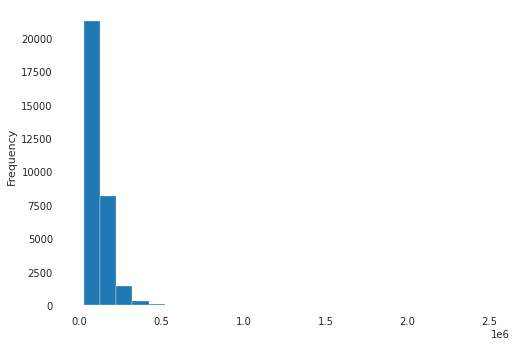

In [35]:
train["賃料"].plot.hist(bins=25)
# 10万円がもっとも多く、0～20万円まででほとんどを占める。


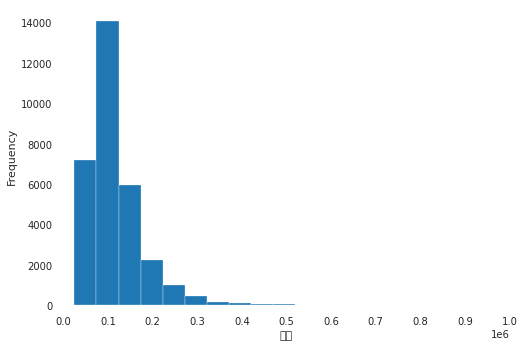

In [56]:
import matplotlib.ticker as ticker
plt.hist(train["賃料"], bins=50)
plt.xlim(0, 1000000)
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.xlabel("賃料")
plt.ylabel("Frequency")
plt.show()

In [67]:
train["アクセス"].value_counts().head(20)

都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t西武新宿線\t沼袋駅\t徒歩15分                      65
総武本線\t馬喰町駅\t徒歩4分\t\t都営浅草線\t浅草橋駅\t徒歩4分                                                61
都営三田線\t板橋区役所前駅\t徒歩5分\t\t東武東上線\t下板橋駅\t徒歩7分\t\t都営三田線\t新板橋駅\t徒歩8分                       49
東西線\t木場(東京都)駅\t徒歩5分\t\t都営大江戸線\t門前仲町駅\t徒歩15分\t\t京葉線(東京－蘇我)\t越中島駅\t徒歩17分               48
西武新宿線\t鷺ノ宮駅\t徒歩8分\t\t西武新宿線\t都立家政駅\t徒歩14分\t\t西武新宿線\t下井草駅\t徒歩20分                       45
総武本線\t馬喰町駅\t徒歩4分\t\t総武線・中央線（各停）\t浅草橋駅\t徒歩4分\t\t都営新宿線\t馬喰横山駅\t徒歩8分                    44
都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩14分\t\t日比谷線\t築地駅\t徒歩21分                           36
有楽町線\t新富町(東京都)駅\t徒歩3分\t\t日比谷線\t八丁堀(東京都)駅\t徒歩4分\t\t日比谷線\t築地駅\t徒歩5分                    30
都営新宿線\t住吉(東京都)駅\t徒歩7分\t\t都営新宿線\t西大島駅\t徒歩19分\t\t都営新宿線\t菊川(東京都)駅\t徒歩20分                29
ゆりかもめ\t芝浦ふ頭駅\t徒歩2分\t\t山手線\t田町(東京都)駅\t徒歩15分\t\t都営三田線\t三田(東京都)駅\t徒歩19分                 29
東西線\t神楽坂駅\t徒歩5分\t\t都営大江戸線\t牛込神楽坂駅\t徒歩8分\t\t総武線・中央線（各停）\t飯田橋駅\t徒歩11分                  27
都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\

In [68]:
train["所在地"].value_counts().head(20)

東京都板橋区板橋３丁目1-8         54
東京都世田谷区太子堂２丁目          53
東京都足立区新田１丁目            47
東京都中野区白鷺２丁目1-21        45
東京都中央区日本橋馬喰町２丁目4-12    44
東京都豊島区池袋３丁目            43
東京都豊島区東池袋２丁目           40
東京都墨田区緑４丁目             39
東京都中野区江古田３丁目14-3       38
東京都豊島区南長崎５丁目           38
東京都中央区日本橋馬喰町２丁目        38
東京都杉並区方南１丁目            36
東京都港区南麻布１丁目            36
東京都中央区勝どき６丁目           35
東京都足立区栗原３丁目            34
東京都渋谷区笹塚２丁目            34
東京都台東区三筋１丁目            34
東京都杉並区堀ノ内３丁目           34
東京都江東区牡丹１丁目13-6        34
東京都中央区新富１丁目            33
Name: 所在地, dtype: int64

In [88]:
train["間取り"].value_counts().head(35)

1K            11930
1R             5082
1LDK           4823
2LDK           2552
2DK            1909
1DK            1893
3LDK           1124
2K              920
3DK             419
1LDK+S(納戸)      238
2LDK+S(納戸)      157
4LDK            124
1K+S(納戸)         75
3LDK+S(納戸)       68
3K               48
2DK+S(納戸)        25
4DK              16
5LDK             15
1DK+S(納戸)        14
4LDK+S(納戸)       12
3DK+S(納戸)         6
4K                4
5LDK+S(納戸)        4
5DK               4
6LDK              2
1LK+S(納戸)         2
3K+S(納戸)          1
2K+S(納戸)          1
5K                1
5DK+S(納戸)         1
Name: 間取り, dtype: int64

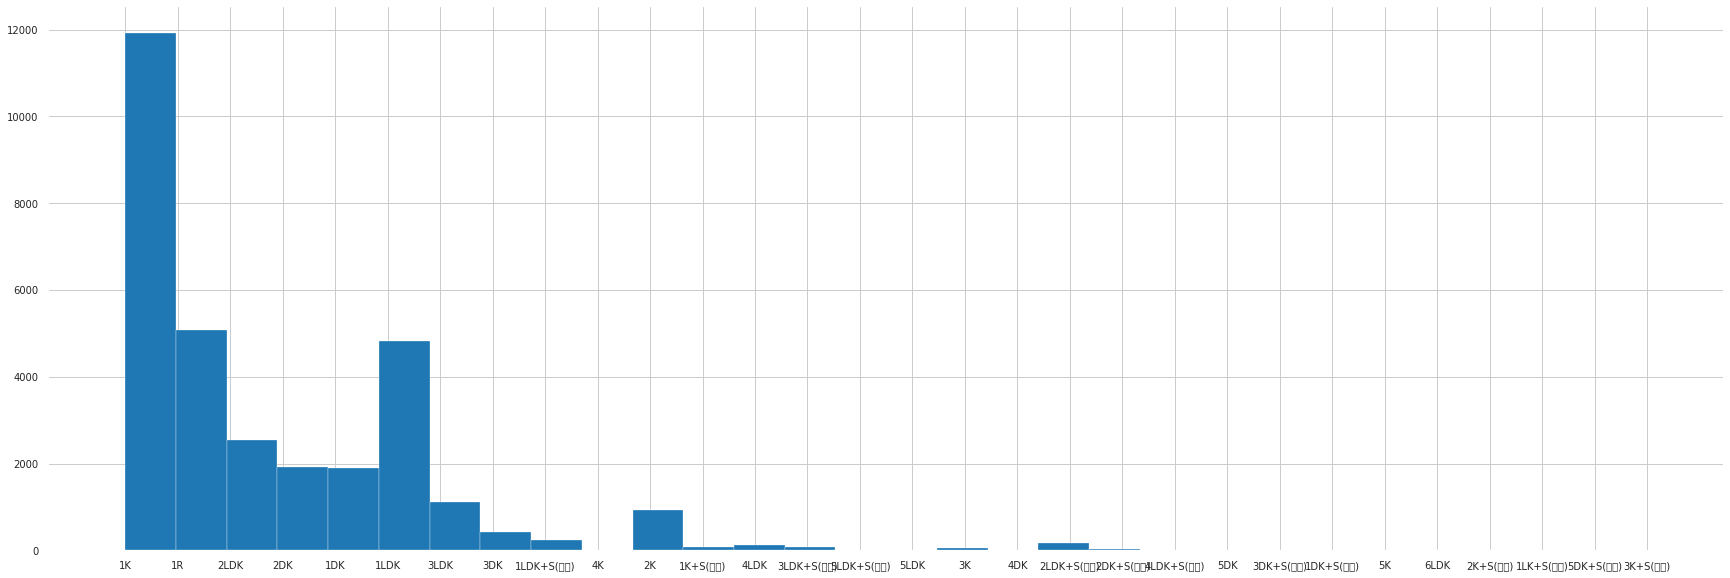

In [93]:
train["間取り"].hist(bins=30, figsize=(30, 10))

In [107]:
# train["放送・通信"].value_counts()
train_nanpro = train.copy()
# train[train["放送・通信"].str.match('.*なし.*')]
# train["放送・通信"].str.match(r'.*なし.*')

train_nanpro["放送・通信"] = train["放送・通信"].fillna("空です")
# train_nanpro["放送・通信"].head(30)
# print(train_nanpro["放送・通信"].str.match('.*です.*').value_counts())
# train_nanpro[train_nanpro["放送・通信"].str.match('.*です.*')]
# train["放送・通信"].value_counts()

train["放送・通信"].isnull().value_counts()

False    28030
True      3440
Name: 放送・通信, dtype: int64